In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
import numpy as np
from collections import Counter

sys.path.append('../')

import utils as ut
from unsupervised.clustering import Hierarchical,GaussianMixture

plt.style.use('seaborn-v0_8-pastel')

/Users/johnhenryrudden/anaconda3/envs/ml_mono/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Goal replicate similar visualizations for each clustering algorithm as is present on [SKLearn's Clustering page](https://scikit-learn.org/stable/modules/clustering.html)

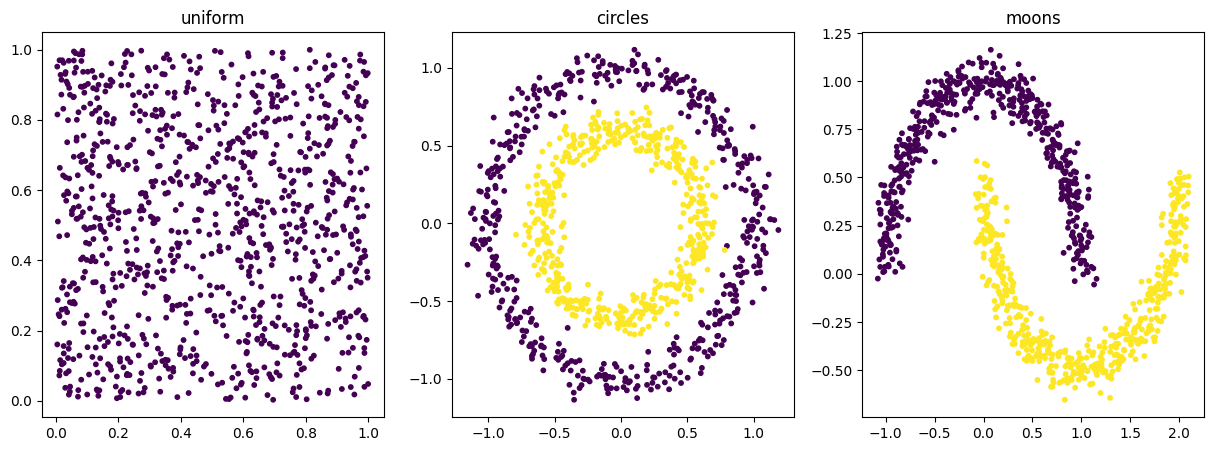

In [2]:
n_samples = 1_000
n_features = 2
random_state = 42

uniform = ut.generate_uniform_noise(n_samples=n_samples, n_features=n_features, random_state=random_state)
circles = ut.make_circles_2d(n_samples, noise=0.07, factor=0.6, random_state=0)
moons = ut.make_moons_2d(n_samples, noise=0.07, random_state=0)

datasets = {
    'uniform': {
        'data': uniform,
        'labels': None
    },
    'circles': {
        'data': circles[0],
        'labels': circles[1]
    },
    'moons': {
        'data': moons[0],
        'labels': moons[1]
    }
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, dataset) in zip(axes, datasets.items()):
    data = dataset['data']
    labels = dataset['labels']
    if labels is None:
        labels = np.zeros(n_samples)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    ax.set_title(name)
plt.show()

### Gaussian Mixture Model

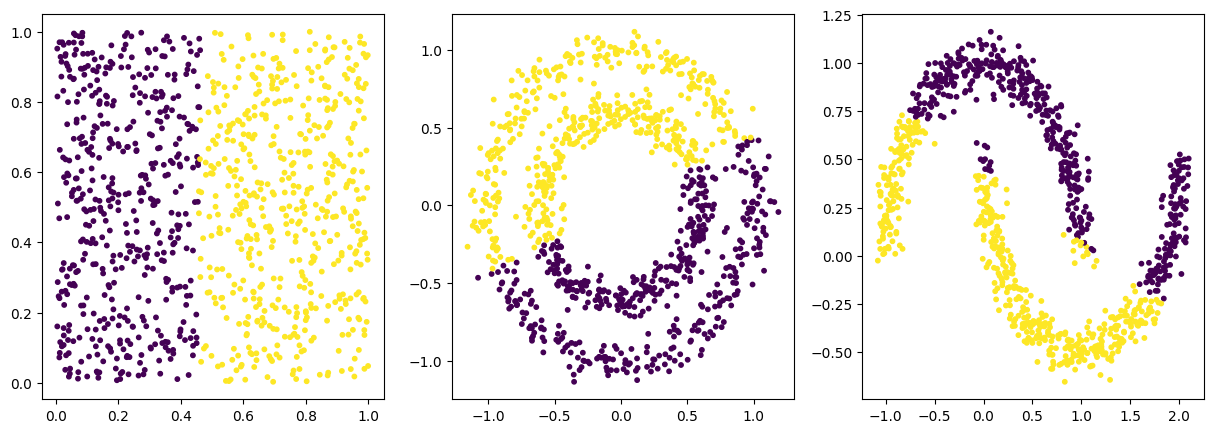

In [3]:
model = GaussianMixture(n_components=2)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, dataset) in enumerate(datasets.items()):
    data = dataset['data']
    labels = dataset['labels']
    if labels is None:
        labels = np.zeros(n_samples)
    pred_labels = model.fit_predict(data)
    pred_labels = model.predict(data)
    axes[i].scatter(data[:, 0], data[:, 1], c=pred_labels, s=10)


#### Hierarchical Clustering

In [4]:
K = 3
assert K <= 10, "K must be less than 10"
# hierarchical = Hierarchical(linkage='ward')
# y_pred = hierarchical.fit_predict(X, K)

In [5]:
# pass
# clusters = hierarchical.clusters
# cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, K)))
# for i, cluster in enumerate(clusters):
#     dp = hierarchical.X[clusters[cluster]]
#     color = np.ones((dp.shape[0], 1)) * i
#     plt.scatter(dp[:,0], dp[:,1] , label="Cluster {}".format(cluster), color=cmap(i), alpha=0.65, s=20)
# plt.legend()
# plt.title(f"Hierarchical Clustering with {K} clusters")
# plt.show()

In [6]:
X, y = make_circles_2d(1000, noise=0.07, factor=0.6, random_state=0)
plt.title(f"Dataset with 2 cluster (uses KMeans)")
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.65, s=20)
plt.show()

NameError: name 'make_circles_2d' is not defined

In [ ]:
X, y = make_moons_2d(1000, noise=0.07, random_state=0)
plt.title(f"Moons")
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.65, s=20)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
rng = np.random.RandomState(42)
no_structure, y = rng.rand(10_000, 2), None
no_structure